In [2]:
#Ingest data from the NYC website only for DHPD
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_90b10fbeca6c4d058035417d934397fa = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='eGM4hoDEBWEHIkj2wVo951MSw9QUVyaLAPd3wvsnVQMk',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_90b10fbeca6c4d058035417d934397fa.get_object(Bucket='nycproject-donotdelete-pr-dcxrsxebrzgstt',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2013-01-11T13:25:34.000,24765056,HPD Literature Request,NaN,NaN,NaN,NaN,NaN,The literature has been mailed. If it has not ...,Unspecified,NaN,NaN,2013-01-11T15:01:56.000,NaN,Closed
1,2018-08-11T19:19:41.000,39981834,PAINT/PLASTER,11429.0,104-34 219 STREET,219 STREET,ADDRESS,Queens Village,The Department of Housing Preservation and Dev...,QUEENS,40.711539,-73.735724,2019-03-30T08:58:02.000,RESIDENTIAL BUILDING,Closed
2,2018-08-11T19:19:41.000,39982698,APPLIANCE,11429.0,104-34 219 STREET,219 STREET,ADDRESS,Queens Village,The Department of Housing Preservation and Dev...,QUEENS,40.711539,-73.735724,2019-03-30T08:58:01.000,RESIDENTIAL BUILDING,Closed
3,2018-08-11T19:19:41.000,39987943,UNSANITARY CONDITION,11429.0,104-34 219 STREET,219 STREET,ADDRESS,Queens Village,The Department of Housing Preservation and Dev...,QUEENS,40.711539,-73.735724,2019-03-30T08:58:01.000,RESIDENTIAL BUILDING,Closed
4,2018-10-23T19:27:06.000,40636028,DOOR/WINDOW,11412.0,116-35 195 STREET,195 STREET,ADDRESS,Saint Albans,The Department of Housing Preservation and Dev...,QUEENS,40.693715,-73.757117,2019-03-30T08:58:02.000,RESIDENTIAL BUILDING,Closed


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Which complaint is the most lodged and should be solved first:

In [10]:
# Returns the top 5 problems and their count
df_top_5_problems = df_data_1.groupby('complaint_type')['complaint_type'].count().sort_values(ascending = False).head()
print(df_top_5_problems)

complaint_type
HEAT/HOT WATER          1146871
HEATING                  887869
PLUMBING                 699224
GENERAL CONSTRUCTION     500863
UNSANITARY CONDITION     428871
Name: complaint_type, dtype: int64


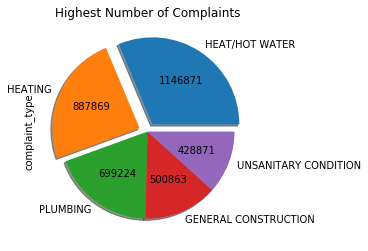

In [5]:
# Pie chart with the different problems and their frequency

sizes = []
for i in range(5):
    sizes.append(df_top_5_problems.iloc[i])

def labels(val):
    a  = int(np.round(val/100.*sum(sizes), 0))
    return a


plot = df_top_5_problems.plot.pie(explode = (0.1,0.1,0,0,0),  autopct = labels, shadow=True, title = 'Highest Number of Complaints')


In [6]:
df_data_1.size

87326925

In [7]:
df_data_1.shape

(5821795, 15)